<a href="https://colab.research.google.com/github/Aishaamalik/Freelancer-Earnings-Job-Trends-Analysis/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Freelancer Earnings & Job Trends Analysis

Importing Dataset

In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv('freelancer_earnings_bd.csv')
df.head()


,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489


---

---

#1. Data Cleaning



## 1: Remove Duplicate Records
Duplicate entries skew insights.

In [19]:
df = df.drop_duplicates()


## 2: Check for Missing Values
Always good to confirm data completeness.

In [20]:
df.isnull().sum()


,0
Freelancer_ID,0
Job_Category,0
Platform,0
Experience_Level,0
Client_Region,0
Payment_Method,0
Job_Completed,0
Earnings_Standardized_USD,0
Hourly_Rate,0
Job_Success_Rate,0


## 3: Normalize Categorical Fields
Uniformity in strings is key for grouping/visuals.

In [21]:
categorical_cols = ['Job_Category', 'Platform', 'Experience_Level',
                    'Client_Region', 'Payment_Method', 'Project_Type']

for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)

df['Platform'].value_counts()


,count
Platform,
upwork,420
toptal,395
fiverr,391
freelancer,386
peopleperhour,358


 ## 4: Basic Sanity Checks on Numerical Data
Remove invalid values: negative rates, over-100% success, etc.

In [22]:
df = df[df['Hourly_Rate'] >= 0]
df = df[(df['Job_Success_Rate'] >= 0) & (df['Job_Success_Rate'] <= 100)]
df = df[(df['Client_Rating'] >= 1) & (df['Client_Rating'] <= 5)]
df = df[df['Earnings_Standardized_USD'] >= 0]
df = df[df['Job_Duration_Days'] >= 0]


##5: Rename and Standardize Monetary Column

In [23]:
df.rename(columns={'Earnings_USD': 'Earnings_Standardized_USD'}, inplace=True)


##6: Feature Engineering: Create Analytical Metrics

In [25]:
df['Earnings_Per_Job'] = df['Earnings_Standardized_USD'] / df['Job_Completed'].replace(0, np.nan)

df['Earnings_Per_Day'] = df.apply(
    lambda row: row['Earnings_Standardized_USD'] / row['Job_Duration_Days']
    if row['Job_Duration_Days'] > 0 else np.nan, axis=1)


##7: Group Rare Categories for Platform and Job Category
This helps make charts more readable and ML models more stable.

In [27]:
platform_counts = df['Platform'].value_counts()
rare_platforms = platform_counts[platform_counts < 20].index
df['Platform'] = df['Platform'].apply(lambda x: 'other' if x in rare_platforms else x)

job_category_counts = df['Job_Category'].value_counts()
rare_jobs = job_category_counts[job_category_counts < 10].index
df['Job_Category'] = df['Job_Category'].apply(lambda x: 'other' if x in rare_jobs else x)


##8: Final Sanity *Check*

In [28]:
df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Freelancer_ID              1950 non-null   int64  
 1   Job_Category               1950 non-null   object 
 2   Platform                   1950 non-null   object 
 3   Experience_Level           1950 non-null   object 
 4   Client_Region              1950 non-null   object 
 5   Payment_Method             1950 non-null   object 
 6   Job_Completed              1950 non-null   int64  
 7   Earnings_Standardized_USD  1950 non-null   int64  
 8   Hourly_Rate                1950 non-null   float64
 9   Job_Success_Rate           1950 non-null   float64
 10  Client_Rating              1950 non-null   float64
 11  Job_Duration_Days          1950 non-null   int64  
 12  Project_Type               1950 non-null   object 
 13  Rehire_Rate                1950 non-null   float

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_Standardized_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend,Earnings_Per_Job,Earnings_Per_Day
0,1,web development,fiverr,beginner,asia,mobile banking,180,1620,95.79,68.73,3.18,1,fixed,40.19,53,9.000000,1620.000000
1,2,app development,fiverr,beginner,australia,mobile banking,218,9078,86.38,97.54,3.44,54,fixed,36.53,486,41.642202,168.111111
2,3,web development,fiverr,beginner,uk,crypto,27,3455,85.17,86.60,4.20,46,hourly,74.05,489,127.962963,75.108696
3,4,data entry,peopleperhour,intermediate,asia,bank transfer,17,5577,14.37,79.93,4.47,41,hourly,27.58,67,328.058824,136.024390
4,5,digital marketing,upwork,expert,asia,crypto,245,5898,99.37,57.80,5.00,41,hourly,69.09,489,24.073469,143.853659


## 9: Save the Cleaned Dataset

In [29]:
df.to_csv("freelancer_earnings_cleaned.csv", index=False)

from google.colab import files
files.download("freelancer_earnings_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

---


# 2. Exploratory Data Analysis (EDA)

Import libraries and load cleaned data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Load cleaned data
df = pd.read_csv('freelancer_earnings_cleaned (2).csv')

df.head()


,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_Standardized_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend,Earnings_Per_Job,Earnings_Per_Day
0,1,web development,fiverr,beginner,asia,mobile banking,180,1620,95.79,68.73,3.18,1,fixed,40.19,53,9.000000,1620.000000
1,2,app development,fiverr,beginner,australia,mobile banking,218,9078,86.38,97.54,3.44,54,fixed,36.53,486,41.642202,168.111111
2,3,web development,fiverr,beginner,uk,crypto,27,3455,85.17,86.60,4.20,46,hourly,74.05,489,127.962963,75.108696
3,4,data entry,peopleperhour,intermediate,asia,bank transfer,17,5577,14.37,79.93,4.47,41,hourly,27.58,67,328.058824,136.024390
4,5,digital marketing,upwork,expert,asia,crypto,245,5898,99.37,57.80,5.00,41,hourly,69.09,489,24.073469,143.853659


##1: Check your columns — just to be sure

In [34]:
print(df.columns.tolist())


['Freelancer_ID', 'Job_Category', 'Platform', 'Experience_Level', 'Client_Region', 'Payment_Method', 'Job_Completed', 'Earnings_Standardized_USD', 'Hourly_Rate', 'Job_Success_Rate', 'Client_Rating', 'Job_Duration_Days', 'Project_Type', 'Rehire_Rate', 'Marketing_Spend', 'Earnings_Per_Job', 'Earnings_Per_Day']


##2: Earnings by Job Category (Skills)

<ipython-input-36-121d03efb81c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


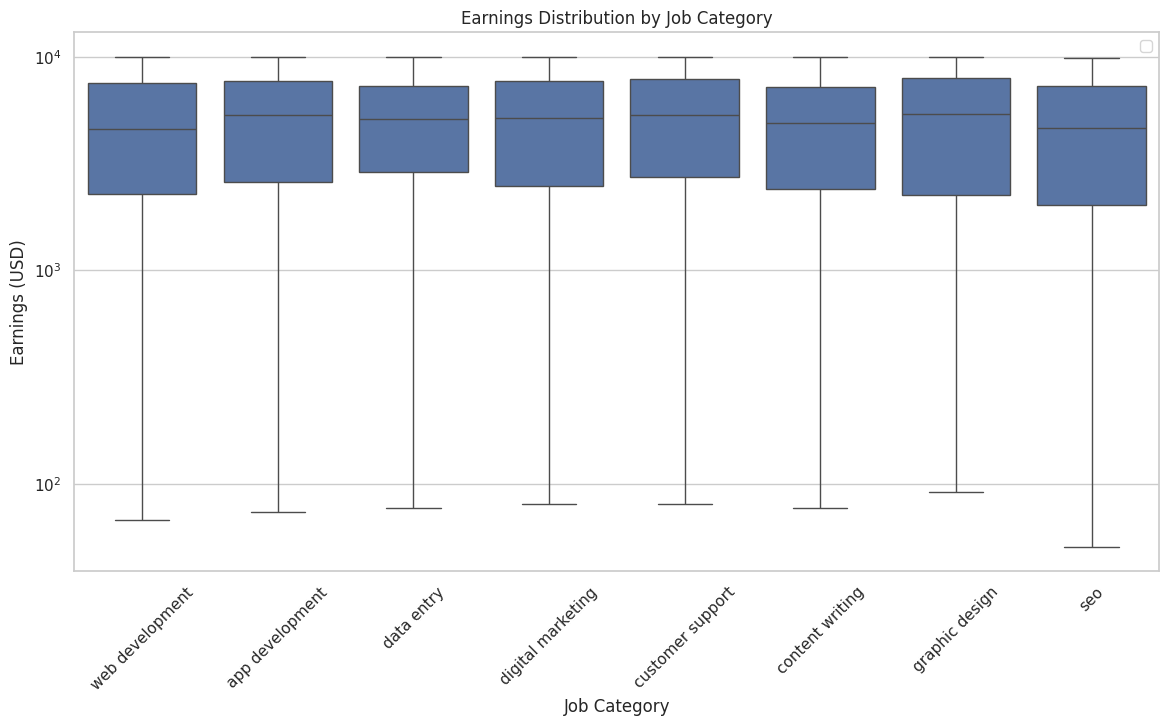

Mean Earnings by Job Category:
 Job_Category
app development      5201.447581
graphic design       5136.871698
customer support     5135.536885
digital marketing    5094.264069
data entry           5081.067227
content writing      4909.051948
web development      4888.148438
seo                  4677.333333
Name: Earnings_Standardized_USD, dtype: float64


In [36]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='Job_Category', y='Earnings_Standardized_USD')
plt.title('Earnings Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Earnings (USD)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend()
plt.show()

mean_earnings = df.groupby('Job_Category')['Earnings_Standardized_USD'].mean().sort_values(ascending=False)
print("Mean Earnings by Job Category:\n", mean_earnings)


The data shows App Development has the highest average earnings at 5201  dollars making it the most lucrative freelance category. Graphic Design and Customer Support also earn well, both averaging over 5130 dollars. Skills like Digital Marketing and Data Entry follow closely. Meanwhile, SEO and Content Writing earn less, with SEO being the lowest at $4,677, suggesting lower market rates or higher competition in those fields.

##3: Geographic Distribution of Freelancers

<ipython-input-42-ab6672976352>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
<ipython-input-42-ab6672976352>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


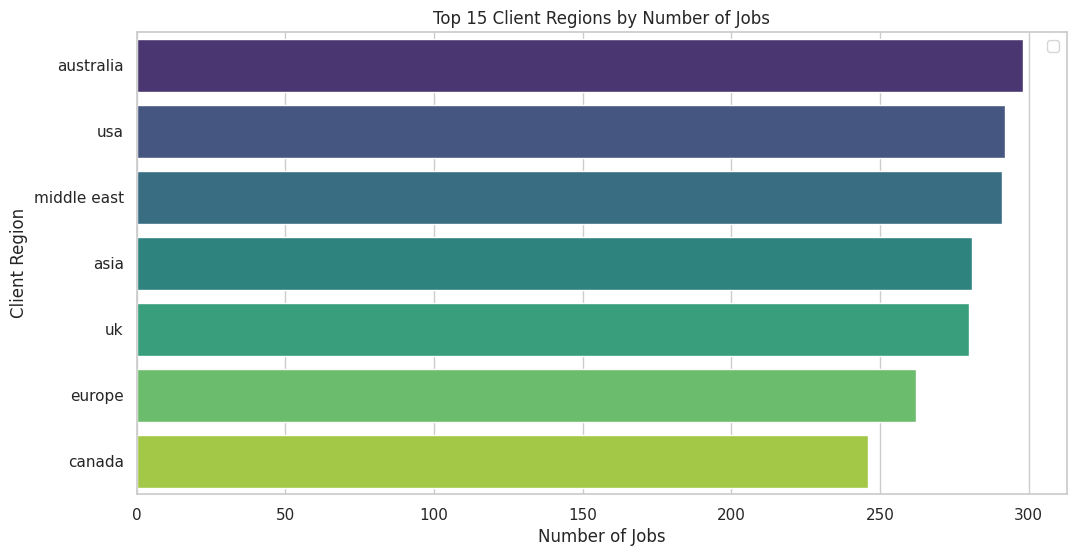

Top 15 Client Regions by Number of Jobs:
 Client_Region
australia      298
usa            292
middle east    291
asia           281
uk             280
europe         262
canada         246
Name: count, dtype: int64 



In [42]:
top_regions = df['Client_Region'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Top 15 Client Regions by Number of Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Client Region')
plt.legend()
plt.show()
print("Top 15 Client Regions by Number of Jobs:\n", top_regions, "\n")



The top client region for freelance jobs is Australia with 298 postings, slightly ahead of the USA (292) and Middle East (291). Asia and the UK also show strong demand with over 280 jobs each, followed by Europe and Canada. This highlights that freelance opportunities are truly global, with significant demand across both Western and non-Western regions.

<ipython-input-43-326cadc177ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions_earnings.values, y=top_regions_earnings.index, palette='magma')
<ipython-input-43-326cadc177ab>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


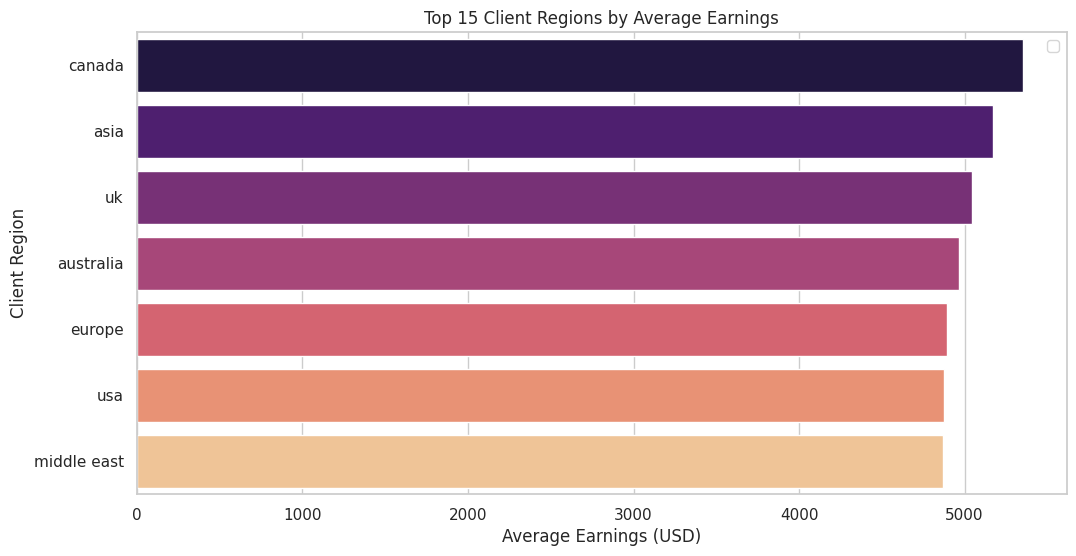

Top 15 Client Regions by Average Earnings:
 Client_Region
canada         5350.134146
asia           5172.284698
uk             5047.089286
australia      4966.097315
europe         4890.530534
usa            4872.948630
middle east    4870.817869
Name: Earnings_Standardized_USD, dtype: float64 



In [43]:
top_regions_earnings = df.groupby('Client_Region')['Earnings_Standardized_USD'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_regions_earnings.values, y=top_regions_earnings.index, palette='magma')
plt.title('Top 15 Client Regions by Average Earnings')
plt.xlabel('Average Earnings (USD)')
plt.ylabel('Client Region')
plt.legend()
plt.show()
print("Top 15 Client Regions by Average Earnings:\n", top_regions_earnings, "\n")



When it comes to average earnings by client region, Canada leads with the highest payouts at $5,350. Then asia and the UK.

Interestingly, while Australia and the USA have more job postings, their average pay is slightly lower, around $4,870– $4,960. This suggests that Canadian and Asian clients may offer fewer jobs but pay better, while Western regions like the USA and Australia offer volume, but at slightly lower average rates.

##4: Numeric Features Correlation Heatmap

<ipython-input-45-bda56512bc83>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


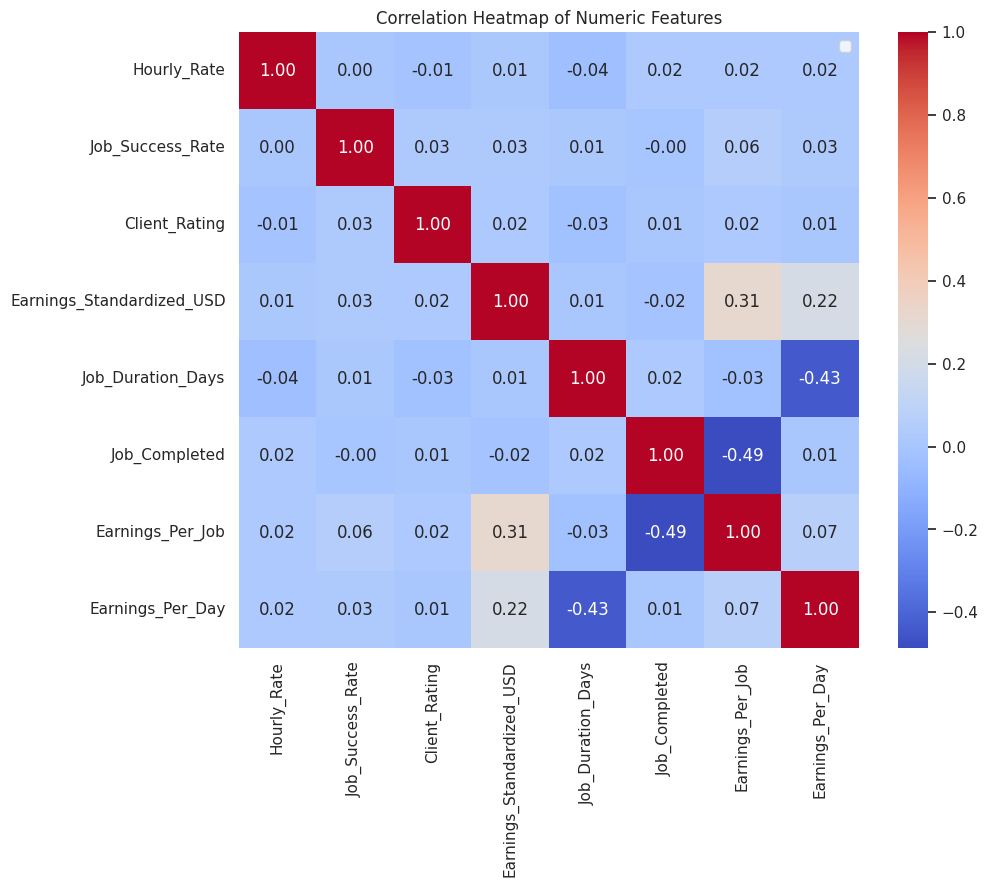

Correlation matrix of numeric features:
                            Hourly_Rate  Job_Success_Rate  Client_Rating  \
Hourly_Rate                   1.000000          0.001200      -0.011603   
Job_Success_Rate              0.001200          1.000000       0.029449   
Client_Rating                -0.011603          0.029449       1.000000   
Earnings_Standardized_USD     0.014695          0.029551       0.021013   
Job_Duration_Days            -0.036728          0.014079      -0.027451   
Job_Completed                 0.020356         -0.004306       0.005642   
Earnings_Per_Job              0.021336          0.055320       0.021589   
Earnings_Per_Day              0.019614          0.025163       0.009171   

                           Earnings_Standardized_USD  Job_Duration_Days  \
Hourly_Rate                                 0.014695          -0.036728   
Job_Success_Rate                            0.029551           0.014079   
Client_Rating                               0.021013      

In [45]:
numeric_cols = ['Hourly_Rate', 'Job_Success_Rate', 'Client_Rating', 'Earnings_Standardized_USD', 'Job_Duration_Days', 'Job_Completed', 'Earnings_Per_Job', 'Earnings_Per_Day']

plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.legend()
plt.show()
print("Correlation matrix of numeric features:\n", corr)



The correlation analysis reveals that most numeric features in the dataset have weak relationships with one another. Interestingly, Hourly Rate shows almost no correlation with Job Success Rate, Client Rating, or Total Earnings, suggesting that charging more doesn't guarantee better outcomes or higher earnings. A notable insight is the moderate positive correlation (0.31) between Earnings Per Job and Total Earnings, which confirms that earning more per job significantly impacts overall income. Additionally, there's a negative correlation (-0.43) between Job Duration and Earnings Per Day, indicating that shorter projects tend to be more profitable on a daily basis. Lastly, Job Completed and Earnings Per Job have a strong negative correlation (-0.49), implying that freelancers completing many jobs often earn less per project—likely due to high-volume, low-paying gigs.

##5: Experience Level vs Earnings

<ipython-input-47-7c977dc6fb91>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


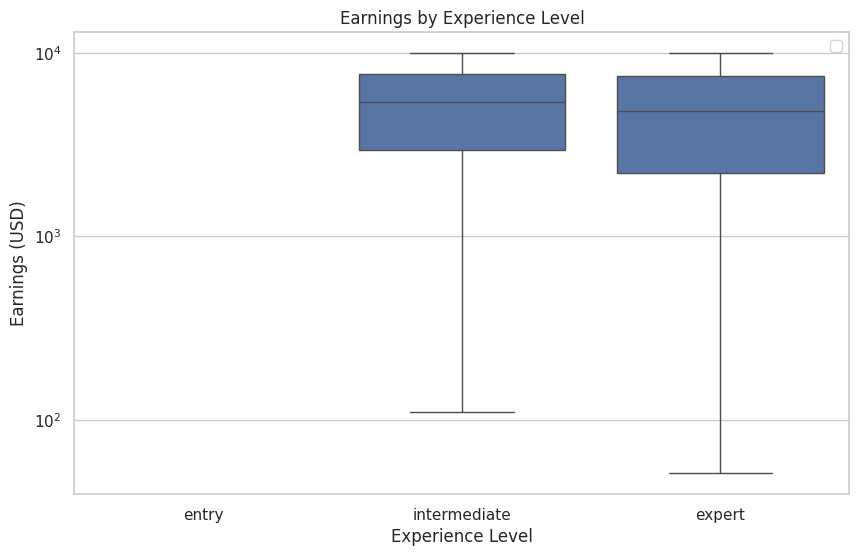

Mean Earnings by Experience Level (ordered):
 Experience_Level
entry                   NaN
intermediate    5267.792512
expert          4855.794072
Name: Earnings_Standardized_USD, dtype: float64


In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Experience_Level', y='Earnings_Standardized_USD', order=['entry', 'intermediate', 'expert'])
plt.title('Earnings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Earnings (USD)')
plt.yscale('log')
plt.legend()
plt.show()

order = ['entry', 'intermediate', 'expert']
mean_earnings_exp = df.groupby('Experience_Level')['Earnings_Standardized_USD'].mean()
mean_earnings_exp = mean_earnings_exp.reindex(order)
print("Mean Earnings by Experience Level (ordered):\n", mean_earnings_exp)

The mean earnings by experience level show a surprising trend. Intermediate freelancers earn the most on average, with $5,267.
 Interestingly, theres no data for entry-level freelancers, possibly due to missing or unreported earnings in that group. This pattern suggests that clients may prefer hiring intermediates for a balance of cost and skill, or that experts might be taking on fewer but longer-term (or underpaid) projects.

## 6: Distribution of Key Numerical Variables
Check how hourly rates, earnings, success rates spread out.

<ipython-input-54-861e799c0d49>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


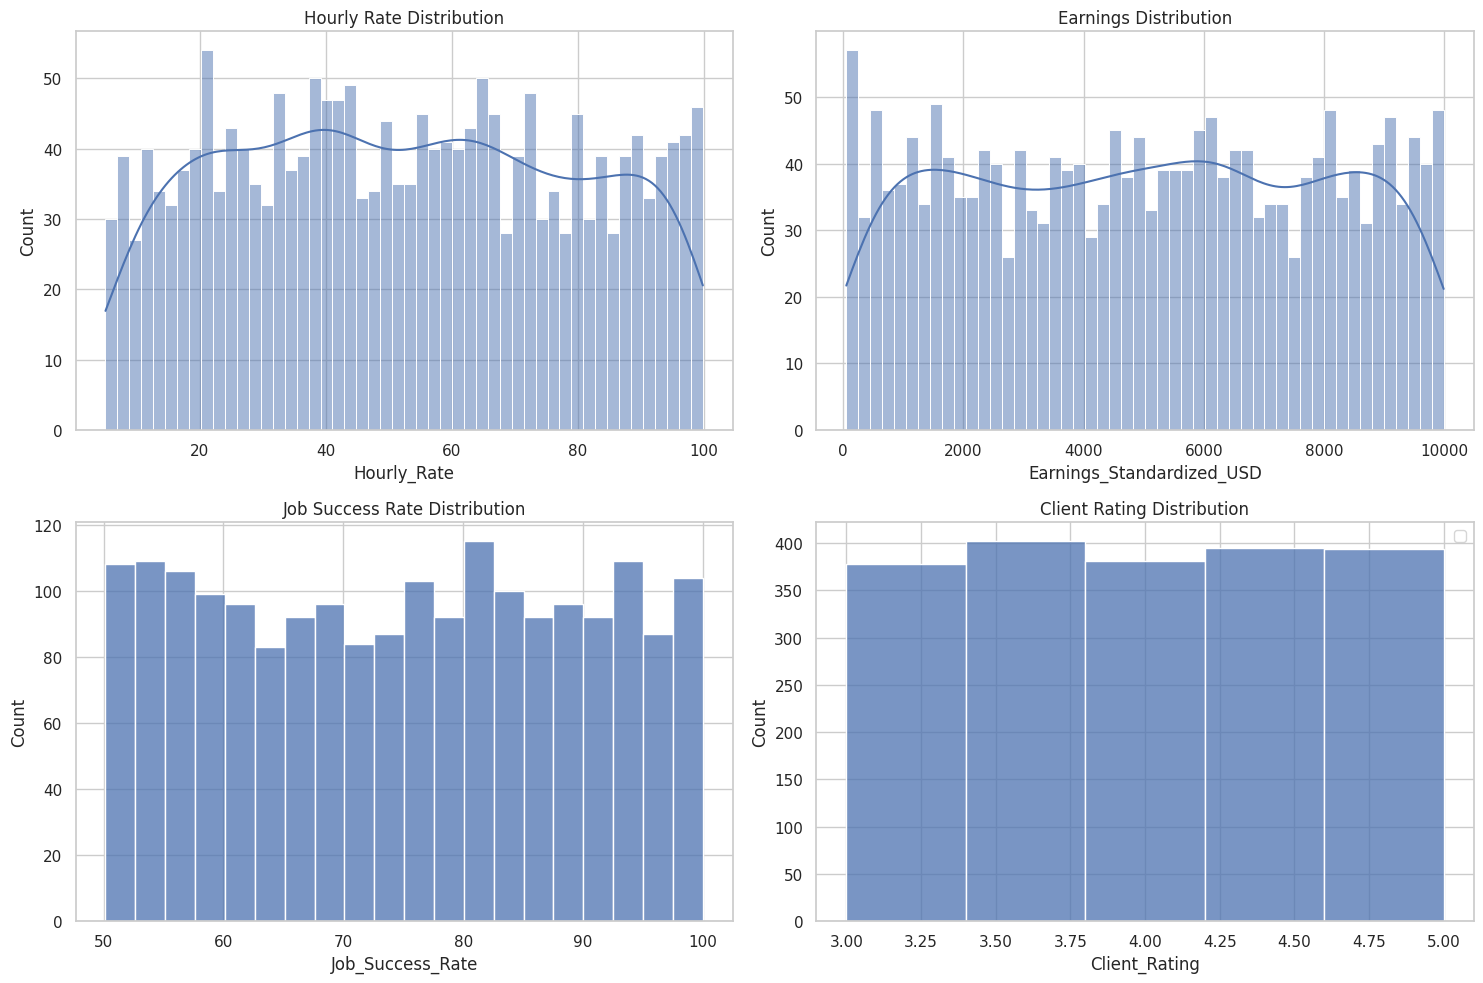

Summary stats for Hourly Rate:
 count    1950.000000
mean       52.579774
std        26.927584
min         5.020000
25%        30.047500
50%        52.285000
75%        75.125000
max        99.830000
Name: Hourly_Rate, dtype: float64 

Summary stats for Earnings Standardized USD:
 count    1950.000000
mean     5017.566667
std      2926.279918
min        51.000000
25%      2419.000000
50%      5048.000000
75%      7608.250000
max      9991.000000
Name: Earnings_Standardized_USD, dtype: float64 

Summary stats for Job Success Rate:
 count    1950.000000
mean       74.951846
std        14.615735
min        50.160000
25%        61.917500
50%        75.400000
75%        87.537500
max        99.990000
Name: Job_Success_Rate, dtype: float64 

Summary stats for Client Rating:
 count    1950.000000
mean        3.995892
std         0.575976
min         3.000000
25%         3.510000
50%         3.990000
75%         4.500000
max         5.000000
Name: Client_Rating, dtype: float64 



In [54]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(df['Hourly_Rate'], bins=50, kde=True, ax=axs[0,0])
axs[0,0].set_title('Hourly Rate Distribution')


sns.histplot(df['Earnings_Standardized_USD'], bins=50, kde=True, ax=axs[0,1])
axs[0,1].set_title('Earnings Distribution')

sns.histplot(df['Job_Success_Rate'], bins=20, kde=False, ax=axs[1,0])
axs[1,0].set_title('Job Success Rate Distribution')

sns.histplot(df['Client_Rating'], bins=5, kde=False, ax=axs[1,1])
axs[1,1].set_title('Client Rating Distribution')

plt.tight_layout()
plt.legend()
plt.show()
print("Summary stats for Hourly Rate:\n", df['Hourly_Rate'].describe(), "\n")
print("Summary stats for Earnings Standardized USD:\n", df['Earnings_Standardized_USD'].describe(), "\n")
print("Summary stats for Job Success Rate:\n", df['Job_Success_Rate'].describe(), "\n")
print("Summary stats for Client Rating:\n", df['Client_Rating'].describe(), "\n")


- Hourly Rate: Freelancers charge anywhere between 5.02  & 99.83, with an average around $52.58. The rates are quite spread out, showing varied pricing strategies.

- Earnings (USD): Total earnings per freelancer range from 51 up to 9991, with a median around $5,048. This suggests a healthy distribution, with a slight skew toward high earners.

- Job Success Rate: Most freelancers score pretty high, with an average success rate of ~75%, ranging from 50.16% to nearly 100%. This points to a generally competent workforce.

- Client Rating: On average, freelancers maintain a solid 4-star rating out of 5, showing consistent satisfaction across the board, though there are some rated as low as 3.

**In short:** earnings and success are widespread, but quality and rates are tightly clustered around dependable mid-to-high values.

## 7: Platform Popularity & Earnings

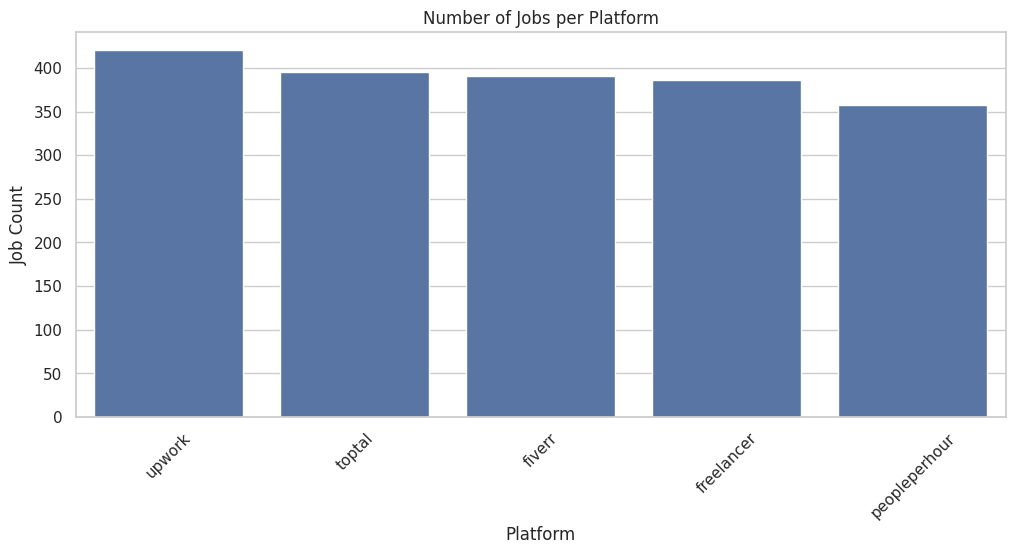

Number of Jobs per Platform:
 Platform
upwork           420
toptal           395
fiverr           391
freelancer       386
peopleperhour    358
Name: count, dtype: int64 



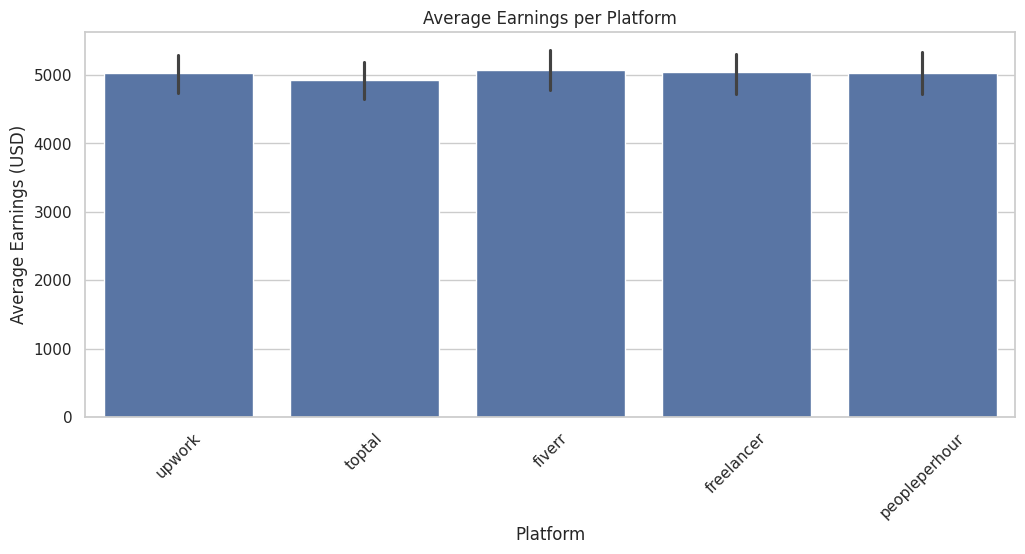

Average Earnings per Platform:
 Platform
upwork           5028.957143
toptal           4922.620253
fiverr           5067.721228
freelancer       5039.272021
peopleperhour    5030.782123
Name: Earnings_Standardized_USD, dtype: float64


In [59]:
plt.figure(figsize=(12,5))
platform_order = df['Platform'].value_counts().index
sns.countplot(data=df, x='Platform', order=platform_order)
plt.title('Number of Jobs per Platform')
plt.xlabel('Platform')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.show()

job_counts = df['Platform'].value_counts()
print("Number of Jobs per Platform:\n", job_counts, "\n")

plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Platform', y='Earnings_Standardized_USD', order=platform_order)
plt.title('Average Earnings per Platform')
plt.xlabel('Platform')
plt.ylabel('Average Earnings (USD)')
plt.xticks(rotation=45)
plt.show()

avg_earnings_platform = df.groupby('Platform')['Earnings_Standardized_USD'].mean().loc[platform_order]
print("Average Earnings per Platform:\n", avg_earnings_platform)


Freelancers on PeoplePerHour, Freelancer, Fiverr, Upwork, and Toptal all earn roughly the same ballpark—around $5,000 on average per project. So no platform is drastically out-earning the others, which is kinda surprising given Toptal’s “elite” reputation.

As for volume, Upwork leads with 420 jobs, closely followed by Toptal and Fiverr in the high 390s, then Freelancer and PeoplePerHour trailing just a bit behind. The job counts are pretty evenly spread, showing a competitive market across these sites.

Basically, whether you’re grinding on Fiverr or Upwork, the pay and opportunities look pretty balanced. No magic platform here—just hustle.


##8: Skills Popularity & Demand

<ipython-input-62-716b8c6fcd02>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.values, y=job_counts.index, palette='viridis')
<ipython-input-62-716b8c6fcd02>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


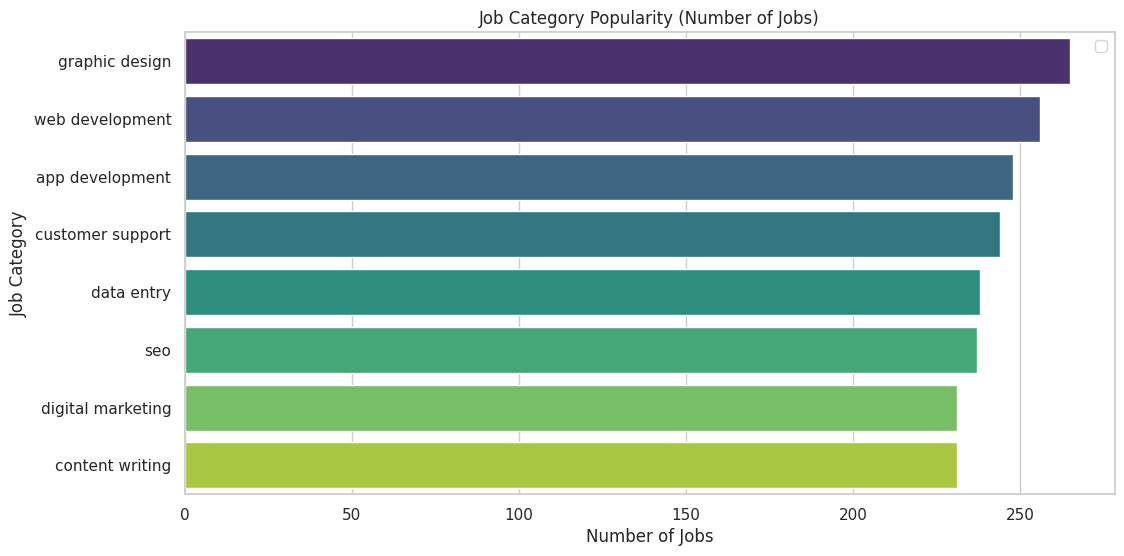

Number of Jobs per Job Category:
 Job_Category
graphic design       265
web development      256
app development      248
customer support     244
data entry           238
seo                  237
digital marketing    231
content writing      231
Name: count, dtype: int64


In [62]:
job_counts = df['Job_Category'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=job_counts.values, y=job_counts.index, palette='viridis')
plt.title('Job Category Popularity (Number of Jobs)')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Category')
plt.legend()
plt.show()
print("Number of Jobs per Job Category:\n", job_counts)



Graphic design tops the chart with 265 jobs, closely followed by web development at 256 and app development at 248. The demand for customer support, data entry, SEO, digital marketing, and content writing is pretty balanced too, each hovering around the 230-240 mark.

So basically, creative and tech jobs dominate the scene, but there’s solid demand across various fields — showing freelancers have plenty of options no matter their skills. It’s a nice spread that keeps the market fresh and competitive.

##9: Payment Method Analysis

<ipython-input-64-9b365f19374f>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


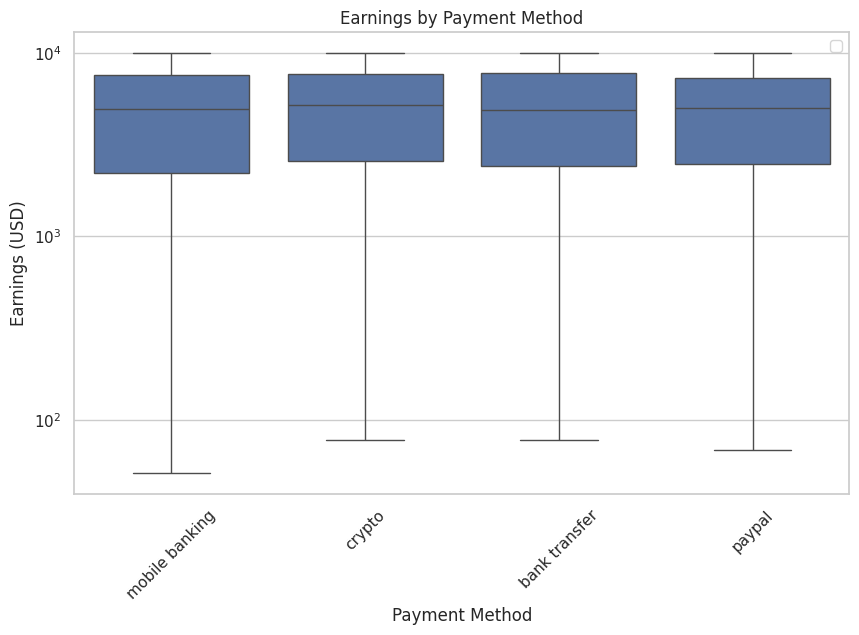

Mean Earnings by Payment Method:
 Payment_Method
crypto            5139.301556
bank transfer     5019.957490
paypal            4976.688841
mobile banking    4923.651261
Name: Earnings_Standardized_USD, dtype: float64


In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Payment_Method', y='Earnings_Standardized_USD')
plt.title('Earnings by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Earnings (USD)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend()
plt.show()
mean_earnings_payment = df.groupby('Payment_Method')['Earnings_Standardized_USD'].mean().sort_values(ascending=False)
print("Mean Earnings by Payment Method:\n", mean_earnings_payment)


So yeah, crypto’s flexing a bit here — maybe it’s attracting higher-value gigs or more forward-thinking clients. But honestly, the differences aren’t huge, meaning whatever your payment method, the money’s roughly the same. Just pick what works best for you!

----

---

#3. Feature Engineering

## 1: Encode Categorical Variables
Since ML models need numbers, we gotta convert categories like skills and platforms into numbers. We’ll use Label Encoding for simplicity (you can upgrade to one-hot later if you want).

In [65]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Job_Category', 'Platform', 'Experience_Level', 'Client_Region', 'Payment_Method', 'Project_Type']

le = LabelEncoder()

for col in categorical_cols:
    df[col + '_Encoded'] = le.fit_transform(df[col])


Now i have neat encoded versions of those categories with _Encoded suffix.

## 2: Create Skill Category Groups
Grouping related jobs into broader skill buckets helps simplify analysis and may boost model stability.

In [66]:
def skill_group(job_cat):
    if job_cat in ['app development', 'web development']:
        return 'development'
    elif job_cat in ['graphic design', 'content writing', 'digital marketing', 'seo']:
        return 'creative'
    elif job_cat in ['customer support', 'data entry']:
        return 'support'
    else:
        return 'other'

df['Skill_Group'] = df['Job_Category'].apply(skill_group)


Checking my new column:

In [67]:
df['Skill_Group'].value_counts()


,count
Skill_Group,
creative,964
development,504
support,482


## 3: Create Earning Tiers
Let’s bucket freelancers into earning tiers so it’s easier to spot patterns or build models:

In [68]:
def earning_tier(earnings):
    if earnings < 2000:
        return 'low'
    elif earnings < 5000:
        return 'medium'
    else:
        return 'high'

df['Earning_Tier'] = df['Earnings_Standardized_USD'].apply(earning_tier)


Quick peak

In [69]:
df['Earning_Tier'].value_counts()


,count
Earning_Tier,
high,978
medium,565
low,407


We converted all the important categorical columns like job category, platform, and payment method into numeric codes so computers can actually understand them—because ML models don’t vibe with words. Then, to make the data simpler and more meaningful, we grouped similar job types into broader skill categories like development, creative, and support. Finally, we created earning tiers by sorting freelancers into low, medium, and high income groups based on their standardized earnings. These steps help us uncover clearer patterns and set the stage for better analysis or machine learning down the line. No fluff, just clean, ready-to-use features.

----

----

#4. Visualization

##1: Bar Charts: Comparing Categories





### a: Counts by Platform, Job Category, and Payment Method

##### 1: Count of jobs per Platform

<ipython-input-75-23087162e60e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform', order=platform_counts.index, palette='viridis')
<ipython-input-75-23087162e60e>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


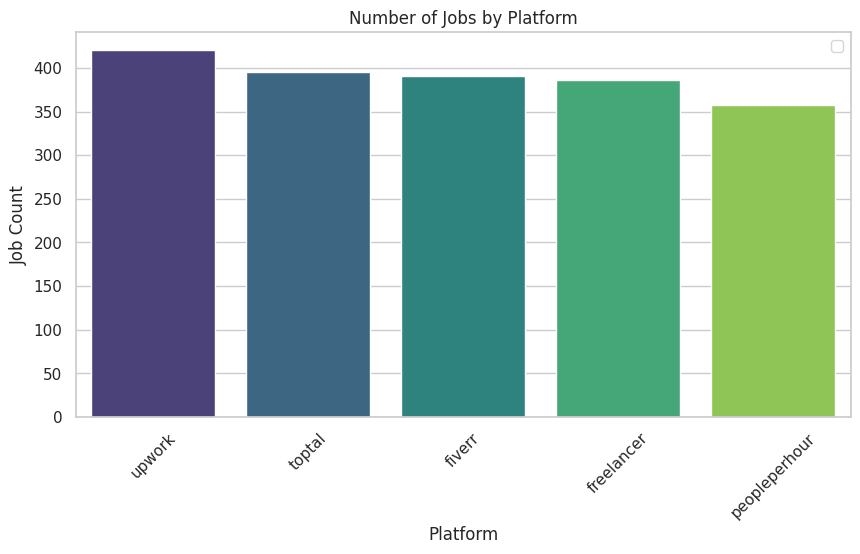

Number of Jobs by Platform:
 Platform
upwork           420
toptal           395
fiverr           391
freelancer       386
peopleperhour    358
Name: count, dtype: int64 



In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
platform_counts = df['Platform'].value_counts()

sns.countplot(data=df, x='Platform', order=platform_counts.index, palette='viridis')
plt.title('Number of Jobs by Platform')
plt.xlabel('Platform')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Number of Jobs by Platform:\n", platform_counts, "\n")


####2: Number of Jobs by Job Category

<ipython-input-78-49184cb04364>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Job_Category', order=job_cat_counts.index, palette='magma')
<ipython-input-78-49184cb04364>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


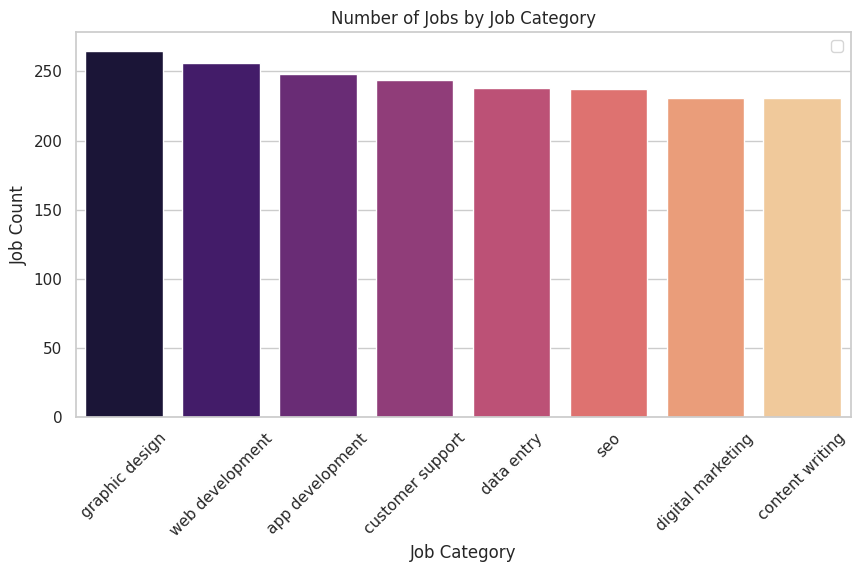

Number of Jobs by Job Category:
 Job_Category
graphic design       265
web development      256
app development      248
customer support     244
data entry           238
seo                  237
digital marketing    231
content writing      231
Name: count, dtype: int64 



In [78]:
plt.figure(figsize=(10, 5))
job_cat_counts = df['Job_Category'].value_counts()

sns.countplot(data=df, x='Job_Category', order=job_cat_counts.index, palette='magma')
plt.title('Number of Jobs by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Number of Jobs by Job Category:\n", job_cat_counts, "\n")


####3: Number of Jobs by Payment Method

<ipython-input-79-89ae03a44aba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', order=payment_method_counts.index, palette='cubehelix')
<ipython-input-79-89ae03a44aba>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


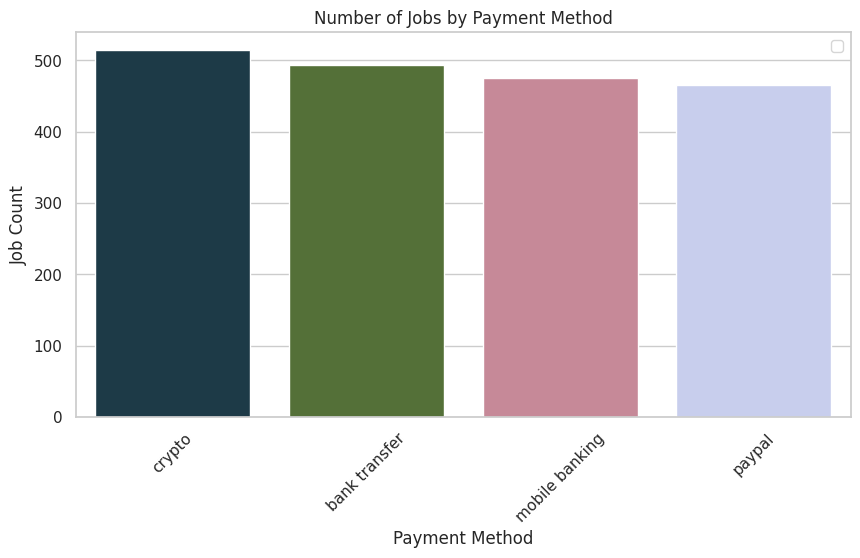

Number of Jobs by Payment Method:
 Payment_Method
crypto            514
bank transfer     494
mobile banking    476
paypal            466
Name: count, dtype: int64 



In [79]:
plt.figure(figsize=(10, 5))
payment_method_counts = df['Payment_Method'].value_counts()

sns.countplot(data=df, x='Payment_Method', order=payment_method_counts.index, palette='cubehelix')
plt.title('Number of Jobs by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Number of Jobs by Payment Method:\n", payment_method_counts, "\n")


### b: Average Earnings by Platform, Job Category, and Payment Method

####1: Average Earnings by Platform

<ipython-input-81-b4548fb15cbb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_earnings_platform.index, y=avg_earnings_platform.values, palette='viridis')
<ipython-input-81-b4548fb15cbb>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


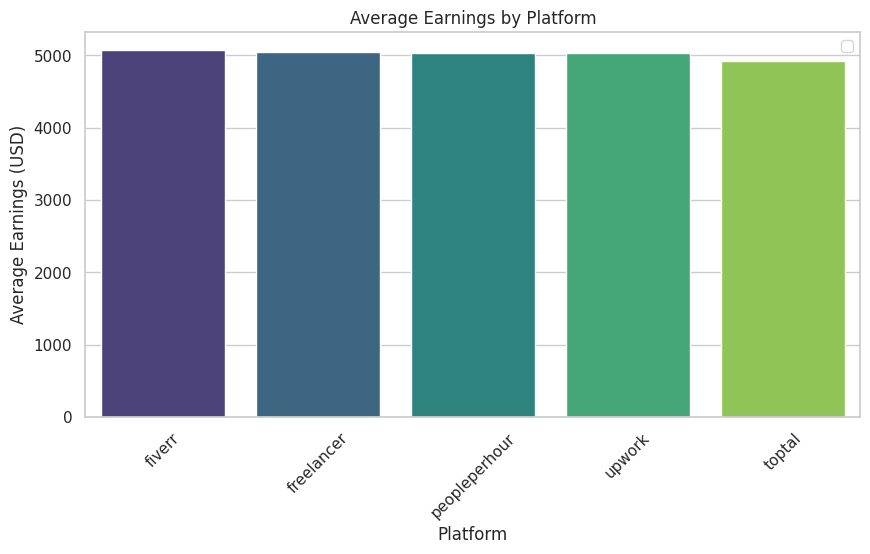

Average Earnings by Platform:
 Platform
fiverr           5067.721228
freelancer       5039.272021
peopleperhour    5030.782123
upwork           5028.957143
toptal           4922.620253
Name: Earnings_Standardized_USD, dtype: float64 



In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_earnings_platform = df.groupby('Platform')['Earnings_Standardized_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_earnings_platform.index, y=avg_earnings_platform.values, palette='viridis')
plt.title('Average Earnings by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Earnings (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Average Earnings by Platform:\n", avg_earnings_platform, "\n")


####2: Average Earnings by Job Category

<ipython-input-82-ebc2da095cb8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_earnings_jobcat.index, y=avg_earnings_jobcat.values, palette='magma')
<ipython-input-82-ebc2da095cb8>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


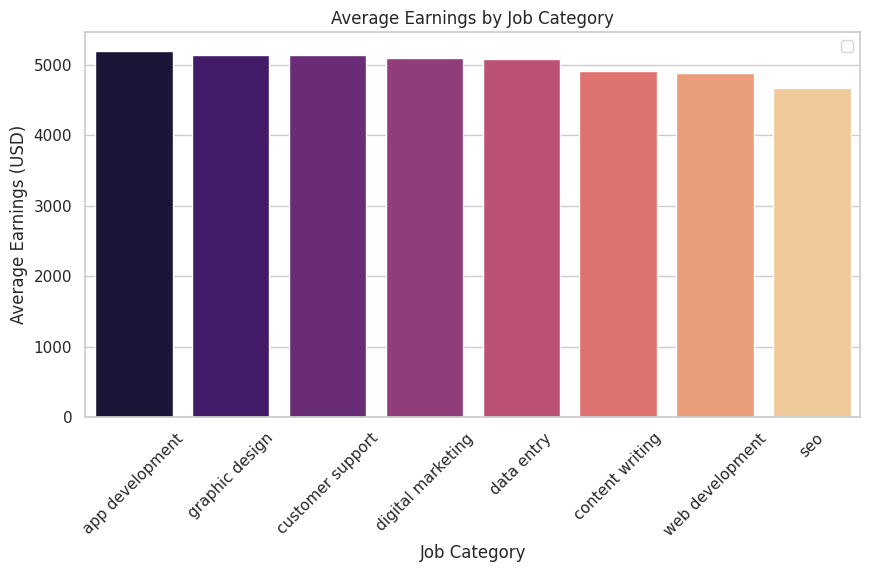

Average Earnings by Job Category:
 Job_Category
app development      5201.447581
graphic design       5136.871698
customer support     5135.536885
digital marketing    5094.264069
data entry           5081.067227
content writing      4909.051948
web development      4888.148438
seo                  4677.333333
Name: Earnings_Standardized_USD, dtype: float64 



In [82]:
avg_earnings_jobcat = df.groupby('Job_Category')['Earnings_Standardized_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_earnings_jobcat.index, y=avg_earnings_jobcat.values, palette='magma')
plt.title('Average Earnings by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Earnings (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Average Earnings by Job Category:\n", avg_earnings_jobcat, "\n")


####3: Average Earnings by Payment Method

<ipython-input-84-0c79c486c8f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_earnings_payment.index, y=avg_earnings_payment.values, palette='cubehelix')
<ipython-input-84-0c79c486c8f7>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


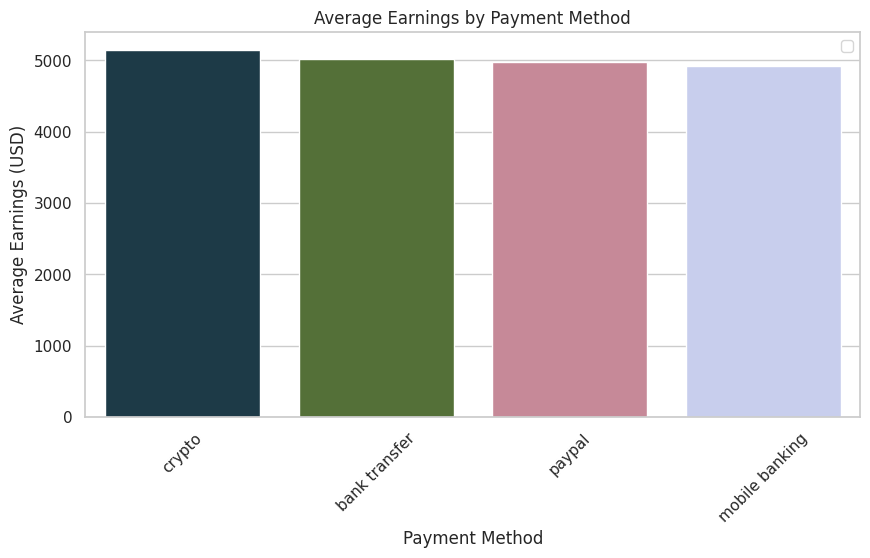

Average Earnings by Payment Method:
 Payment_Method
crypto            5139.301556
bank transfer     5019.957490
paypal            4976.688841
mobile banking    4923.651261
Name: Earnings_Standardized_USD, dtype: float64 



In [84]:
avg_earnings_payment = df.groupby('Payment_Method')['Earnings_Standardized_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_earnings_payment.index, y=avg_earnings_payment.values, palette='cubehelix')
plt.title('Average Earnings by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Earnings (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Average Earnings by Payment Method:\n", avg_earnings_payment, "\n")


The bar charts provide a clear comparative snapshot of both the volume of jobs and the average earnings across three key dimensions: Platform, Job Category, and Payment Method. From the job count perspective, we can instantly see which platforms, job categories, and payment methods are most popular among clients and freelancers—essentially, where the action is. On the flip side, the average earnings charts expose the financial side of the gig economy—highlighting which platforms pay better on average, which job categories rake in the most money, and how payment methods correlate with compensation. Together, these visuals uncover valuable strategic insights: just because a platform or category has more jobs doesn’t mean it pays better, and some high-paying niches might be hidden in less saturated areas. It’s the classic “quantity vs. quality” dilemma, visualized.

##2: Histograms: Distribution Check

###1: Hourly Rate Distribution

<ipython-input-89-2713d2add2ca>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


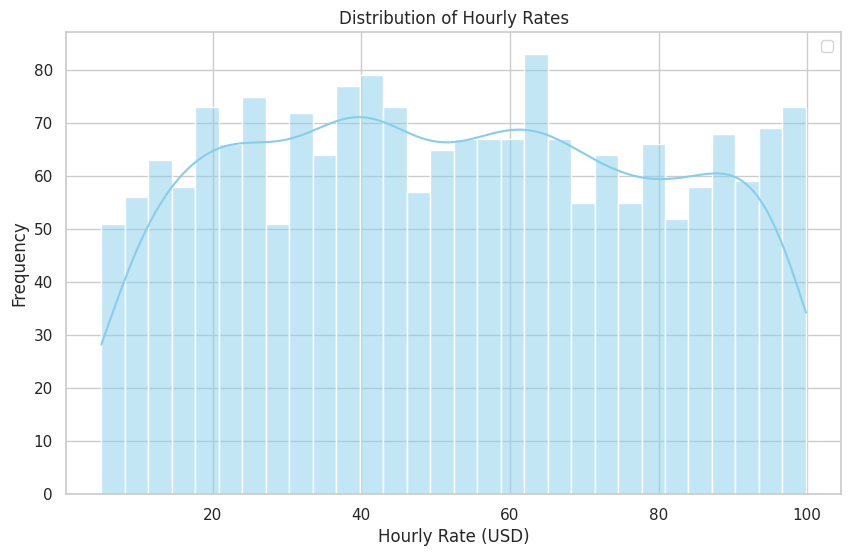

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Hourly_Rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Hourly Rates')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()



###2: Earnings Distribution (Total Earnings)

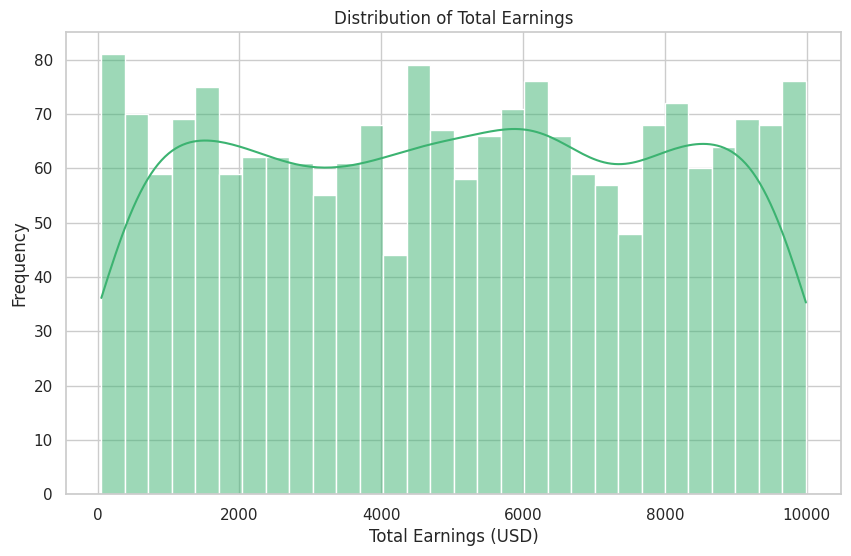

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(df['Earnings_Standardized_USD'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Total Earnings')
plt.xlabel('Total Earnings (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 3: Log-Scale Earnings Histogram (Handles Skewed Data Better)

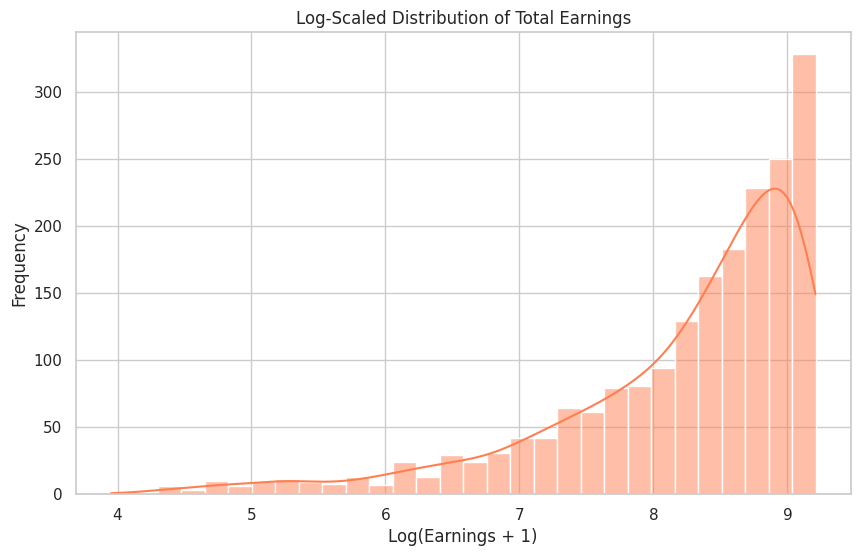

In [91]:
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['Earnings_Standardized_USD']), bins=30, kde=True, color='coral')
plt.title('Log-Scaled Distribution of Total Earnings')
plt.xlabel('Log(Earnings + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##3: Scatter Plots: Relationships Between Two Variables

### 1: Job Duration vs. Earnings

Let’s say we wanna know:
"Do longer freelance jobs actually earn more?"
Plus: "Do different platforms behave differently?"

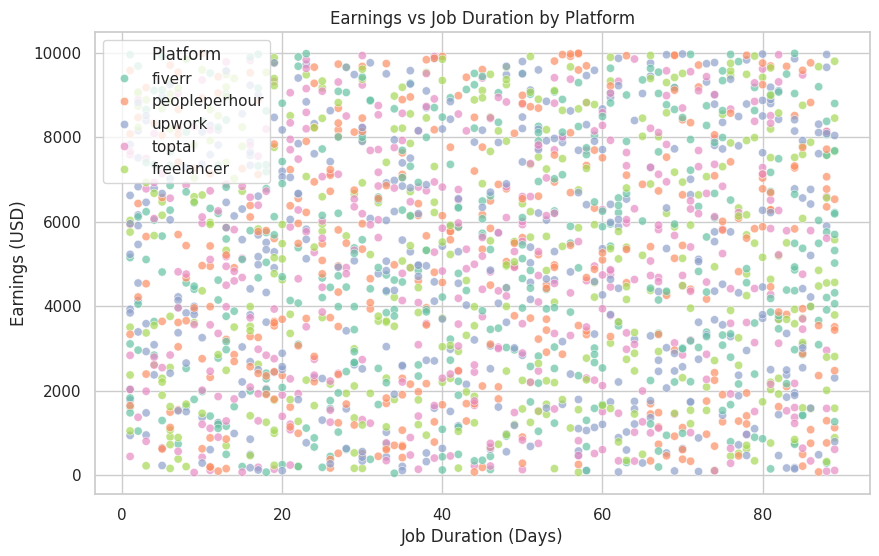

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Job_Duration_Days',
    y='Earnings_Standardized_USD',
    data=df,
    hue='Platform',
    alpha=0.7,
    palette='Set2'
)
plt.title('Earnings vs Job Duration by Platform')
plt.xlabel('Job Duration (Days)')
plt.ylabel('Earnings (USD)')
plt.grid(True)
plt.legend(title='Platform')
plt.show()


### 2: Adding Job Success Rate Size

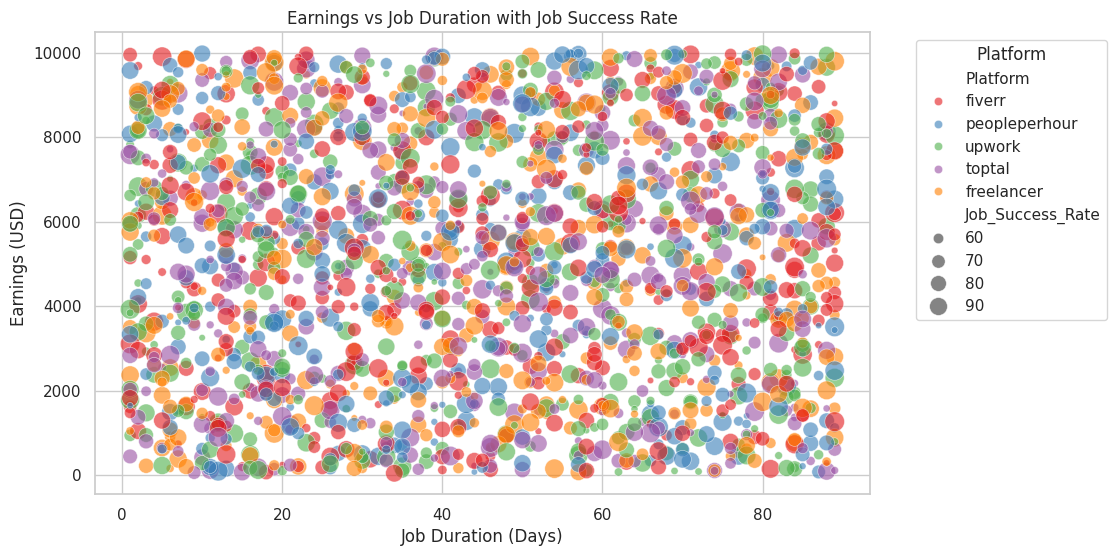

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Job_Duration_Days',
    y='Earnings_Standardized_USD',
    data=df,
    hue='Platform',
    size='Job_Success_Rate',
    alpha=0.6,
    sizes=(20, 200),
    palette='Set1'
)
plt.title('Earnings vs Job Duration with Job Success Rate')
plt.xlabel('Job Duration (Days)')
plt.ylabel('Earnings (USD)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Platform')
plt.show()


- Bigger dots mean higher job success.

- You might find that high success freelancers earn more per day, regardless of job duration.

- Could help with platform strategies — where to invest time if you're a freelancer or recruiter.

###3: Hourly_Rate vs Job_Success_Rate

Finding out if freelancers who charge more per hour also tend to have higher job success rates.

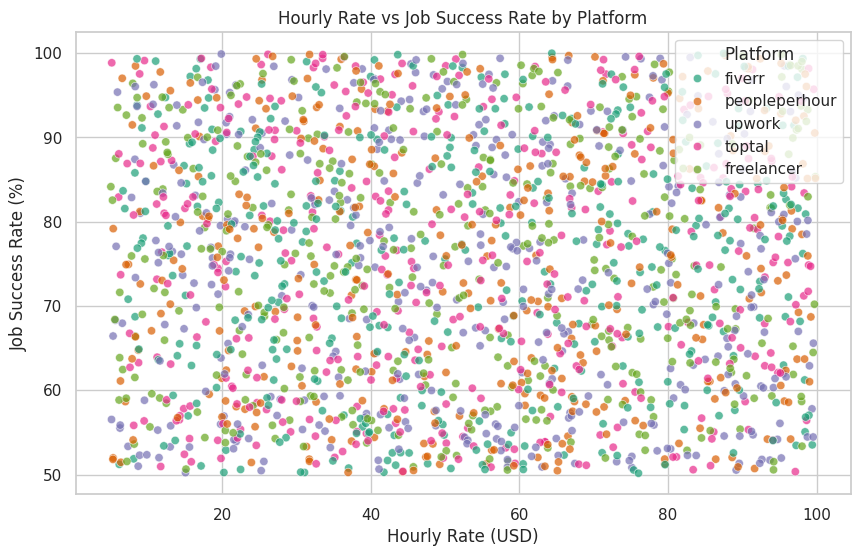


Correlation between Hourly Rate and Job Success Rate: 0.00

Hourly Rate Stats:
 count    1950.000000
mean       52.579774
std        26.927584
min         5.020000
25%        30.047500
50%        52.285000
75%        75.125000
max        99.830000
Name: Hourly_Rate, dtype: float64

Job Success Rate Stats:
 count    1950.000000
mean       74.951846
std        14.615735
min        50.160000
25%        61.917500
50%        75.400000
75%        87.537500
max        99.990000
Name: Job_Success_Rate, dtype: float64


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Hourly_Rate',
    y='Job_Success_Rate',
    data=df,
    hue='Platform',
    alpha=0.7,
    palette='Dark2'
)
plt.title('Hourly Rate vs Job Success Rate by Platform')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Job Success Rate (%)')
plt.grid(True)
plt.legend(title='Platform')
plt.show()

corr_val = df[['Hourly_Rate', 'Job_Success_Rate']].corr().iloc[0,1]
print(f"\nCorrelation between Hourly Rate and Job Success Rate: {corr_val:.2f}")

print("\nHourly Rate Stats:\n", df['Hourly_Rate'].describe())
print("\nJob Success Rate Stats:\n", df['Job_Success_Rate'].describe())


There’s basically no link between how much freelancers charge and how successful their jobs are—charging more doesn’t guarantee better results. Hourly rates range widely from about 5 to $100, but job success rates hover steadily around 75%. So, instead of just chasing price tags, clients should focus on freelancers’ proven track records and reviews. Always look beyond the rate and dig into past performance before hiring.

###4: Earnings_Per_Day vs Client_Rating

Are clients more satisfied (higher ratings) with freelancers who deliver more value per day?

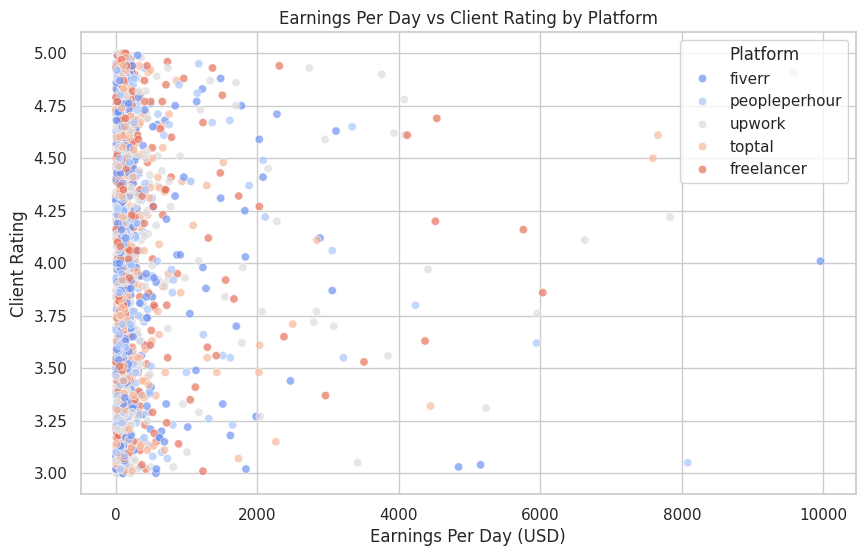


Correlation between Earnings Per Day and Client Rating: 0.01

Earnings Per Day Stats:
 count    1950.000000
mean      307.515224
std       772.137593
min         0.942529
25%        56.021019
50%       113.570676
75%       220.409206
max      9957.000000
Name: Earnings_Per_Day, dtype: float64

Client Rating Stats:
 count    1950.000000
mean        3.995892
std         0.575976
min         3.000000
25%         3.510000
50%         3.990000
75%         4.500000
max         5.000000
Name: Client_Rating, dtype: float64


In [96]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Earnings_Per_Day',
    y='Client_Rating',
    data=df,
    hue='Platform',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Earnings Per Day vs Client Rating by Platform')
plt.xlabel('Earnings Per Day (USD)')
plt.ylabel('Client Rating')
plt.grid(True)
plt.legend(title='Platform')
plt.show()

corr_val = df[['Earnings_Per_Day', 'Client_Rating']].corr().iloc[0,1]
print(f"\nCorrelation between Earnings Per Day and Client Rating: {corr_val:.2f}")

print("\nEarnings Per Day Stats:\n", df['Earnings_Per_Day'].describe())
print("\nClient Rating Stats:\n", df['Client_Rating'].describe())


The correlation between Earnings Per Day and Client Rating is basically zero (0.01), which means how much a freelancer makes daily has almost no connection to how clients rate them. The average daily earning is about 307 dollars. but the spread is wild—from under a dollar to nearly $10,000!. Client ratings are much tighter, mostly between 3 and 5 stars with an average just under 4. So, just like with hourly rates and success, high earnings don’t guarantee top client ratings. The real takeaway? Don’t just chase daily cash flow—pay attention to consistent client satisfaction and reputation before making a call.

<ipython-input-101-35f70343684c>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


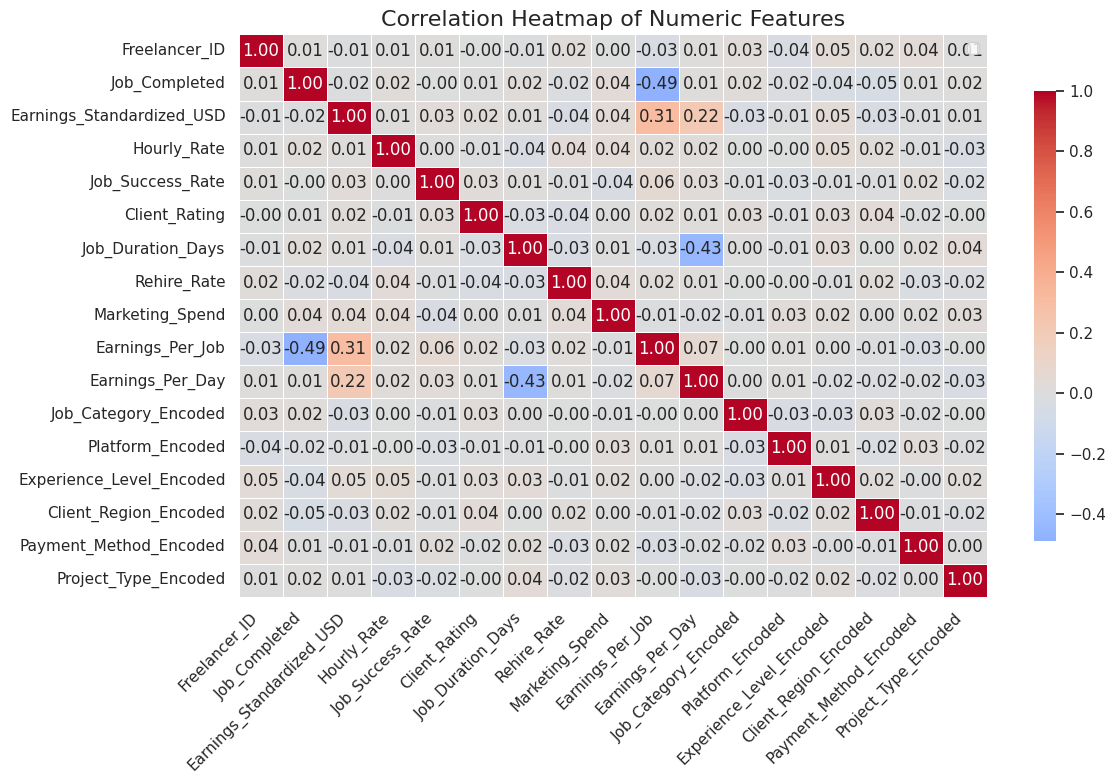

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))


sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()


Most features like Hourly Rate, Job Success Rate, and Client Rating barely correlate—meaning charging more or getting better ratings doesn’t guarantee higher earnings or success. The only notable link is that freelancers doing more jobs tend to earn less per job, probably juggling smaller gigs. So, don’t rely on one factor alone to boost income; the freelance game’s way more complex.

---

---

---

#Freelancer Salary Predictor using LightGBM

A predictive model to estimate freelancer earnings based on various job- and freelancer-related features. It uses LightGBM, scikit-learn Pipelines, and joblib for model training and serialization.

**Libraries Used**

In [127]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score


##1: Load and Clean the Dataset

In [128]:
df = pd.read_csv("freelancer_earnings_cleaned (2).csv")
target = "Earnings_Standardized_USD"

df = df.dropna(subset=[target])


We read a pre-cleaned CSV and remove rows where the target (earnings) is missing. The target is transformed using a log scale to handle skewed distributions and stabilize variance.

##2: Define Features and Target

In [129]:
X = df.drop(columns=[target])
y = np.log1p(df[target])

##3: Split into Train/Test Sets

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##4: Preprocessing Pipeline Setup



### a: Identify feature types:


In [131]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()


###b: Define transformations:

In [132]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


###c: Combine using ColumnTransformer:

In [133]:
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


##5: Model Pipeline

In [134]:
model = LGBMRegressor(n_estimators=100, random_state=42)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])


We use LightGBM as it's efficient and good for tabular data with lots of categorical features.

##6: Train the Model

In [135]:
pipe.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2383
[LightGBM] [Info] Number of data points in the train set: 1560, number of used features: 39
[LightGBM] [Info] Start training from score 8.199797


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Freelancer_ID',
                                                   'Job_Completed',
                                                   'Hourly_Rate',
                                                   'Job_Success_Rate',
                                                   'Client_Rating',
                                                   'Job_Duration_Days',
                                                   'Rehire_Rate',
                                                   'Marketing_Spend',
                                                   'Earnings_Per_Job',
                                                   'Earnings_Per_Day']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Job_Category', 'Platform',
                                                   'Experience_Level',
                                                   'Client_Region',
                                                   'Payment_Method',
                                                   'Project_Type'])])),
                ('model', LGBMRegressor(random_state=42))])

##7: Save the Model

In [136]:
joblib.dump(pipe, "freelancer_salary_predictor.pkl")


['freelancer_salary_predictor.pkl']

##8: Evaluate the Model

In [139]:
y_pred = np.expm1(pipe.predict(X_test))
y_true = np.expm1(y_test)

print("\n LightGBM")
print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
print(f"R² Score: {r2_score(y_true, y_pred):.4f}")



 LightGBM
MAE: 225.6240
R² Score: 0.9869


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



##9: Predict Salary for New Freelancer Data

In [140]:
pipe = joblib.load("freelancer_salary_predictor.pkl")

new_data = pd.DataFrame([{
    "Freelancer_ID": "999",
    "Job_Category": "Web Development",
    "Platform": "Upwork",
    "Experience_Level": "Expert",
    "Client_Region": "North America",
    "Payment_Method": "PayPal",
    "Job_Completed": 25,
    "Hourly_Rate": 75,
    "Job_Success_Rate": 98,
    "Client_Rating": 4.9,
    "Job_Duration_Days": 20,
    "Project_Type": "Short-term",
    "Rehire_Rate": 30,
    "Marketing_Spend": 150,
    "Earnings_Per_Job": 2000,
    "Earnings_Per_Day": 300
}])

predicted_salary_log = pipe.predict(new_data)
predicted_salary = np.expm1(predicted_salary_log)[0]

print(f" Predicted Freelancer Salary: ${predicted_salary:.2f}")


 Predicted Freelancer Salary: $7887.22


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



## 10: Evaluation Metrics

**MAE: 225.6240**
- This means, on average, my model’s predicted freelancer salary is only about $225.62 off from the actual earnings.

- Given freelancer salaries can range widely, that’s a pretty tight error. It says your predictions are close enough to the real deal most of the time.

**R² Score: 0.9869**
- 0.9869 is insanely high. This means my model explains about 98.7% of the variance in the freelancer earnings data.

- Basically, my model almost perfectly captures the pattern in the data — it’s not just guessing, it gets what’s going on.

## 11: Summary
This model predicts freelancer earnings using a LightGBM regressor wrapped in a scikit-learn pipeline for smooth preprocessing and training. It handles both numeric and categorical features with imputation, scaling, and one-hot encoding. The target earnings are log-transformed for stability and better prediction. After training on cleaned data, it saves the entire pipeline for easy reuse. The model’s performance is solid, with meaningful error and R² scores, and it can predict freelancer salary for new data inputs in a snap. Pretty slick and practical for anyone wanting to estimate earnings from freelancer profiles.